In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.metrics import r2_score
tf.compat.v1.enable_eager_execution()
from tensorflow.keras.layers import Dense,Dropout,SimpleRNN,LSTM
from tensorflow.keras.models import Sequential

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/ppr/D5-Amelie/S4/Office_Amelie-S4.csv",index_col='timestamp')

In [4]:
train_data = df.iloc[:7920]
test_data = df.iloc[7920:]

In [5]:
def load_data(data, seq_len):
    X = []
    y = []
    #print(len(data))
    for i in range(seq_len, len(data)):
        X.append(data.iloc[i-seq_len : i, 0])
        y.append(data.iloc[i, 0])
        #print(y)
   
    
    return [X, y]

In [6]:
# Sequence of training data
seq_len = 24 #choose sequence length

X1, y1= load_data(train_data, seq_len)

In [7]:
#Sequence of testing data
seq_len = 24 #choose sequence length

X2, y2= load_data(test_data, seq_len)

In [8]:
X_train = X1      
y_train = y1
X_test = X2             
y_test = y2

In [9]:
# convert training and testing data to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
  
X_test = np.array(X_test)
y_test = np.array(y_test)

# reshape data to input into 3 dimension
X_train = np.reshape(X_train, (X_train.shape[0], seq_len, 1))
X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))

In [10]:
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ', y_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (7896, 24, 1)
y_train.shape =  (7896,)
X_test.shape =  (696, 24, 1)
y_test.shape =  (696,)


In [11]:
rnn_model = Sequential()

rnn_model.add(SimpleRNN(24,activation="tanh",return_sequences=False, input_shape=(X_train.shape[1],1)))

rnn_model.add(Dense(1))

rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 24)                624       
                                                                 
 dense (Dense)               (None, 1)                 25        
                                                                 
Total params: 649
Trainable params: 649
Non-trainable params: 0
_________________________________________________________________


In [12]:
rnn_model.compile(optimizer="adam",loss="MSE")
rnn_model.fit(X_train, y_train, epochs=300, batch_size=128)

Epoch 1/300
62/62 [==============================] - 2s 6ms/step - loss: 1396.2692
Epoch 2/300
62/62 [==============================] - 0s 6ms/step - loss: 1206.0050
Epoch 3/300
62/62 [==============================] - 0s 6ms/step - loss: 1085.5704
Epoch 4/300
62/62 [==============================] - 0s 6ms/step - loss: 991.4427
Epoch 5/300
62/62 [==============================] - 0s 6ms/step - loss: 932.2058
Epoch 6/300
62/62 [==============================] - 0s 6ms/step - loss: 879.2227
Epoch 7/300
62/62 [==============================] - 0s 6ms/step - loss: 831.6559
Epoch 8/300
62/62 [==============================] - 0s 6ms/step - loss: 788.7380
Epoch 9/300
62/62 [==============================] - 0s 6ms/step - loss: 748.1309
Epoch 10/300
62/62 [==============================] - 0s 6ms/step - loss: 708.5959
Epoch 11/300
62/62 [==============================] - 0s 6ms/step - loss: 672.6830
Epoch 12/300
62/62 [==============================] - 0s 6ms/step - loss: 639.4494
Epoch 13/3

In [13]:
rnn_train_prediction=rnn_model.predict(X_train)
rnn_test_prediction=rnn_model.predict(X_test)

In [14]:
from sklearn.metrics import mean_absolute_error
rnn_mae_train=mean_absolute_error(y_train, rnn_train_prediction)
rnn_mae_test=mean_absolute_error(y_test, rnn_test_prediction)

In [15]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt

In [16]:
rnn_rmse_train = sqrt(mean_squared_error(y_train, rnn_train_prediction))
rnn_rmse_test = sqrt(mean_squared_error(y_test, rnn_test_prediction))
mape_train = mean_absolute_percentage_error(y_train, rnn_train_prediction)
mape_test = mean_absolute_percentage_error(y_test, rnn_test_prediction)

In [17]:
print('Root Mean Squared Error for RNN Model for training is:',rnn_rmse_train)
print('Root Mean Squared Error for RNN Model for testing is:',rnn_rmse_test)
print('Mean Absolute Error for RNN Model for training is:',rnn_mae_train)
print('Mean Absolute Error for RNN Model for testing is:',rnn_mae_test)
print('MAPE for RNN Model for training is:',mape_train)
print('MAPE for RNN Model for testing is:',mape_test)

Root Mean Squared Error for RNN Model for training is: 4.528458518404896
Root Mean Squared Error for RNN Model for testing is: 5.713906591635591
Mean Absolute Error for RNN Model for training is: 2.678006280033784
Mean Absolute Error for RNN Model for testing is: 3.07047031180612
MAPE for RNN Model for training is: 0.11161946244553285
MAPE for RNN Model for testing is: 0.15102896958686055


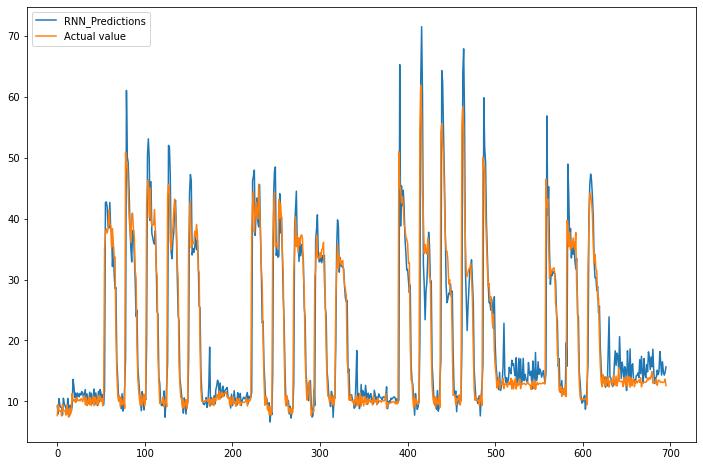

In [18]:
pred=rnn_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='RNN_Predictions')
plt.plot(y_test,label='Actual value')
plt.legend(loc="upper left")
plt.show()

In [19]:
y_test=y_test.reshape(-1,1)

y_test[0],rnn_test_prediction[0]

(array([7.65]), array([9.209131], dtype=float32))

In [20]:
d1=[]
for i in range(len(y_test)):
    d1.append(y_test[i]-rnn_test_prediction[i])
    
print(d1)

[array([-1.55913124]), array([1.58088802]), array([-1.96304729]), array([-0.96413342]), array([-0.53634598]), array([-1.39810913]), array([1.76322029]), array([-1.94629402]), array([-1.09433319]), array([-0.89023724]), array([-1.04743317]), array([1.51240101]), array([-2.22755768]), array([-1.74078953]), array([1.29785309]), array([-1.53035801]), array([-0.04199837]), array([2.08670784]), array([-3.42990883]), array([-2.45452808]), array([-0.31255333]), array([-1.56804893]), array([0.57188328]), array([-1.12245872]), array([-0.98279469]), array([-0.48787739]), array([-1.23151154]), array([-0.61326416]), array([-1.28116245]), array([-1.46877201]), array([0.11290939]), array([-0.30527122]), array([-2.48654396]), array([1.22541801]), array([-1.93916176]), array([0.28267918]), array([0.6885091]), array([-2.10226665]), array([0.97311607]), array([-2.02748199]), array([0.36451294]), array([0.53326591]), array([-2.73329376]), array([1.2598452]), array([-1.3897958]), array([-0.97648628]), arra

In [21]:
d1.sort()
# Range of error value
max(d1),min(d1)

(array([40.81709717]), array([-19.95859589]))

In [22]:
neg=[]
pos=[]
for i in range(len(d1)):
  if(d1[i]<0):
    neg.append(d1[i])
  if(d1[i]>0):  
    pos.append(d1[i])

In [23]:
len(neg),len(pos)

(426, 270)